# Housing Price Predictions with Melbourne Housing Dataset

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [112]:
house_price = pd.read_csv("/Melbourne_housing_FULL.csv")


In [113]:
df = house_price.copy() #this prevents any unintended modifications to the main dataset
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [114]:
df.iloc[:,:5] #observe the first 5 columns

,Suburb,Address,Rooms,Type,Price
0,Abbotsford,68 Studley St,2,h,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0
3,Abbotsford,18/659 Victoria St,3,u,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0
...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0
34853,Yarraville,29A Murray St,2,h,888000.0
34854,Yarraville,147A Severn St,2,t,705000.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0


In [115]:
def data_check(df):
    print("Data Columns: \n {}".format(df.columns))
    print("-----------------")
    print("Data Info: \n {}".format(df.info()))
    print("-----------------")
    print("Data Shape: \n {}".format(df.shape))
    print("-----------------")
    print("Data Size: \n {}".format(df.size))
    print("-----------------")
    print("Data Dimension \n {}".format(df.ndim))
    print("-----------------")
    print("Data Describe \n {}".format(df.describe().T))
    print("-----------------")
    print("Checking missing value in data: \n {}".format(df.isnull().sum()))
    print("-----------------")
    print("Checking dublicated rows in data: \n {}".format(df.duplicated().sum()))
    print("-----------------")
    print("Unique values for each features: \n {}".format(df.nunique()))

data_check(df)

Data Columns: 
 Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-nul

In [116]:
# Examine descriptive statistics of the dataset
print(df.describe())


              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

In [117]:
# Handle Missing Values
numerical_columns = ['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
categorical_columns = ['CouncilArea', 'Regionname']

# Fill missing values in numerical columns with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values in categorical columns with mode
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Remove Duplicates
df.drop_duplicates(inplace=True)

# Remove Outliers based on z-score for Landsize and BuildingArea
from scipy.stats import zscore
z_scores = zscore(df[['Landsize', 'BuildingArea']])
threshold = 3
filtered_data = df[(z_scores < threshold).all(axis=1)]

# Checking the shape of the filtered data after removing outliers
print("Shape after removing outliers:", filtered_data.shape)


Shape after removing outliers: (34782, 21)


In [118]:
# Examine descriptive statistics of the dataset
print(df.describe())


              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34856.000000  3.485600e+04  34856.000000  34856.000000  34856.000000   
mean       3.031013  1.050173e+06     11.184808   3116.062430      3.084650   
std        0.969947  5.671439e+05      6.788855    109.023873      0.857350   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.950000e+05      6.400000   3051.000000      3.000000   
50%        3.000000  1.050173e+06     10.300000   3103.000000      3.000000   
75%        4.000000  1.150000e+06     14.000000   3156.000000      3.084647   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  34856.000000  34856.000000   34856.000000  34856.000000  34856.000000   
mean       1.624759      1.728838     593.604404    160.254514   1965.288889   
std        0.632979      0.875130    2763.733582

In [119]:
categorical_columns = ['Type', 'Method', 'CouncilArea', 'Regionname']  # Add more columns if necessary

for column in categorical_columns:
    df[column] = df[column].astype('category')


In [120]:
# Check for duplicate data and remove duplicates
df.drop_duplicates(inplace=True)


In [121]:
from scipy.stats import zscore

# Calculate z-scores for 'Landsize' and 'BuildingArea'
z_scores = zscore(df[['Landsize', 'BuildingArea']])

# Define a threshold for z-score (e.g., 3)
threshold = 3

# Remove outliers based on the threshold
filtered_data = df[(z_scores < threshold).all(axis=1)]


In [123]:
# Fill missing values in 'Bathroom' and 'Car' columns with mode
categorical_columns = ['Bathroom', 'Car']
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

# Remove rows with any remaining missing values in other columns
df.dropna(inplace=True)


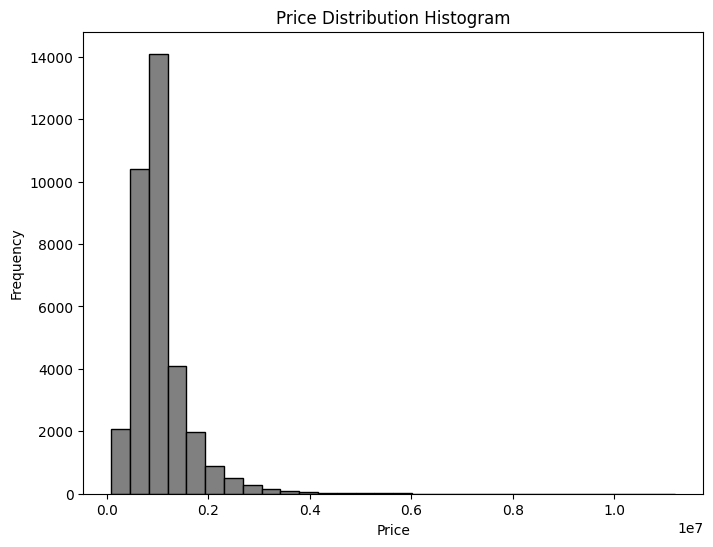

In [124]:

# Build a histogram to visualize price distribution
plt.figure(figsize=(8, 6))
plt.hist(filtered_data['Price'], bins=30, color='grey', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.show()


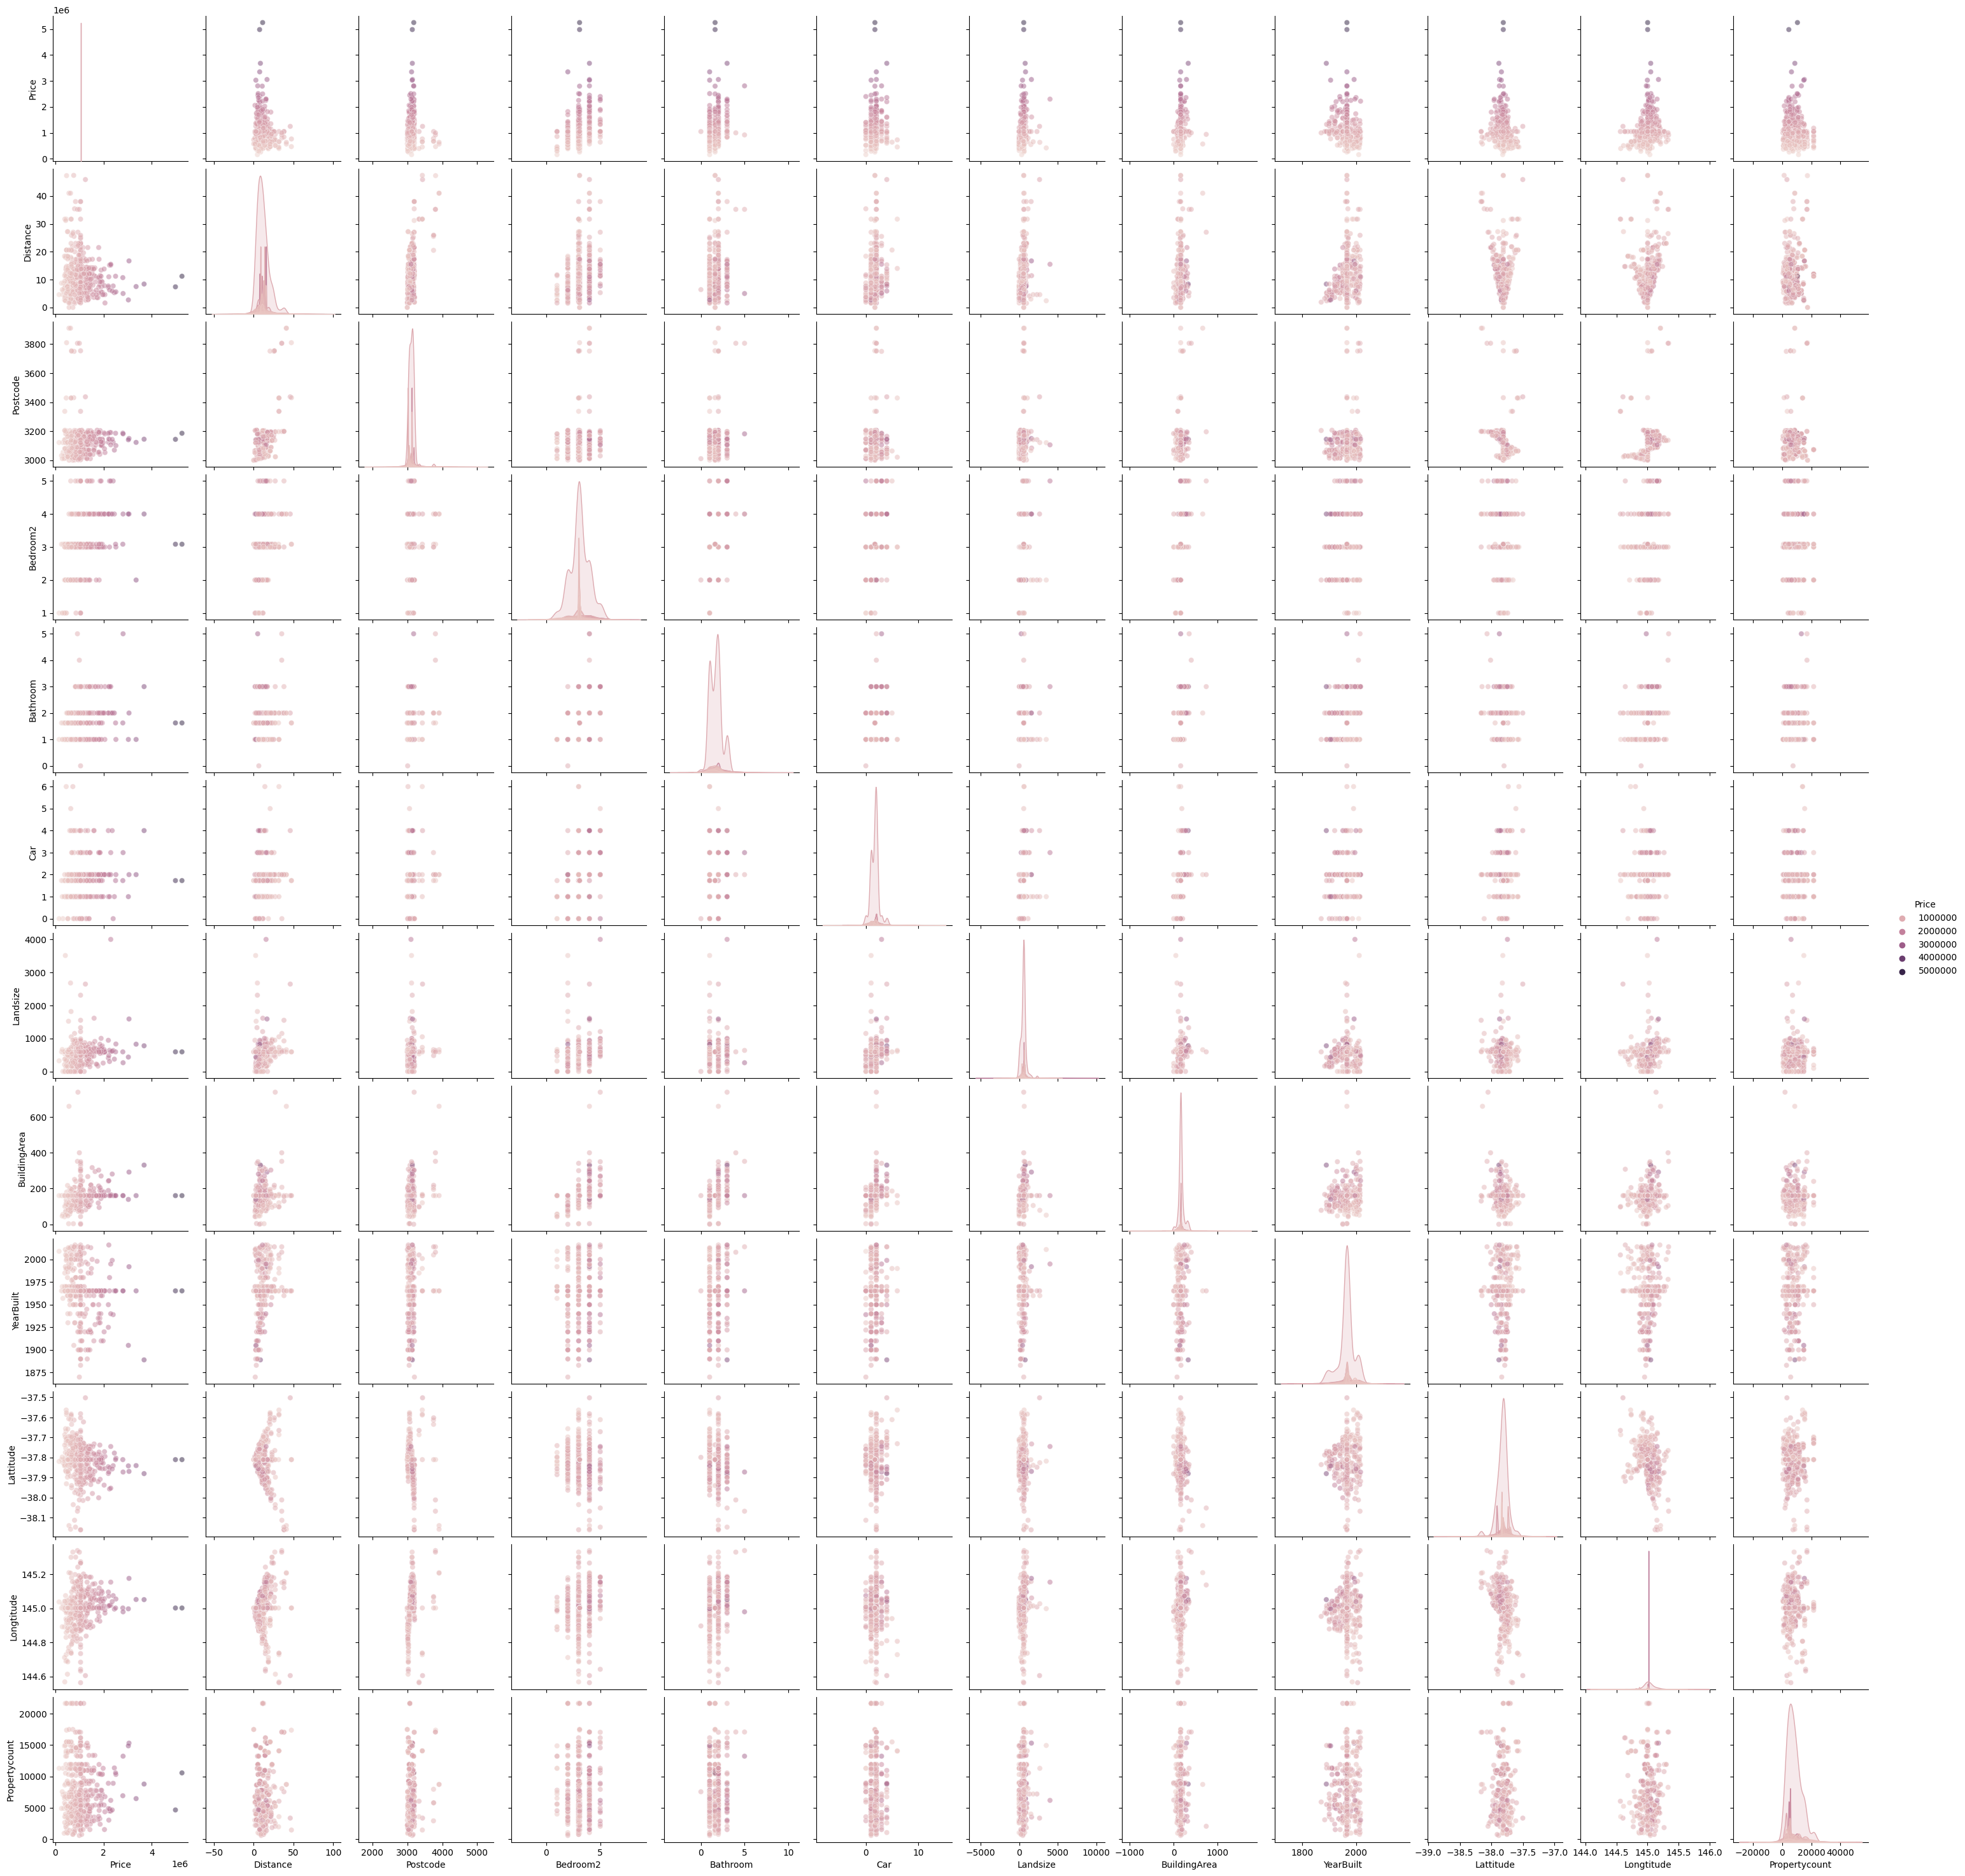

In [128]:
sampled_data = filtered_data.sample(n=500)  # Sample 1000 random data points for visualization
sns.pairplot(sampled_data, vars=numerical_columns, kind='scatter', diag_kind='kde', hue='Price', plot_kws={'alpha':0.5})
plt.show()


<ipython-input-126-a8db3144e655>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data.corr()


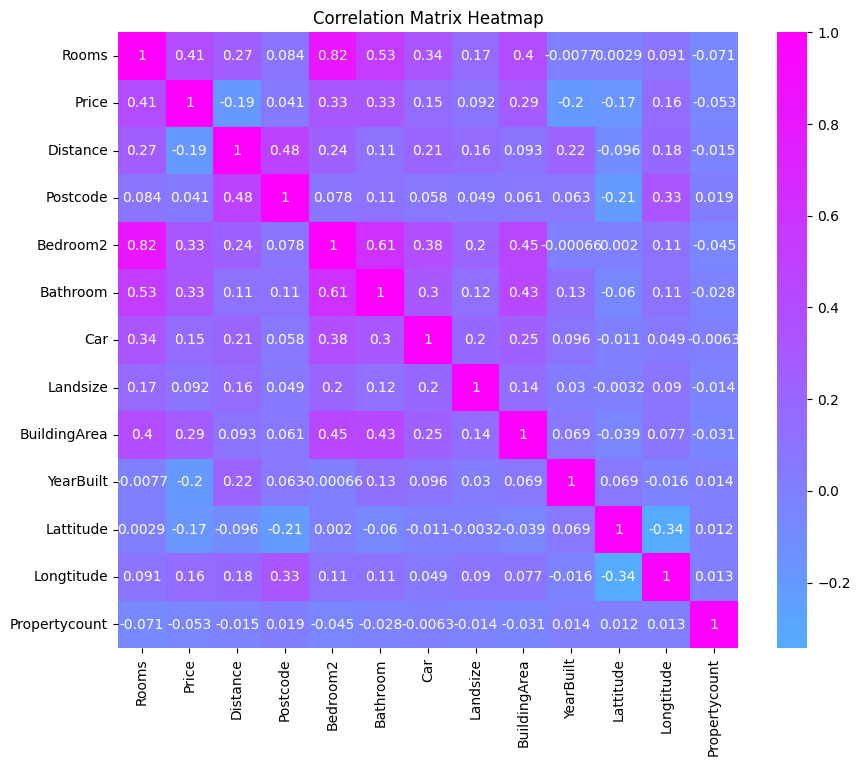

In [126]:
# Draw a correlation matrix using a heatmap
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [127]:
transformed_df=df.copy()
categorical_columns = df.select_dtypes(include="category").columns

le = LabelEncoder()

for i in categorical_columns:
    transformed_df[i]=le.fit_transform(transformed_df[i])

In [68]:
transformed_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,0,1.050173e+06,6,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,160.2564,1965.289885,31,-37.8014,144.9958,2,4019.0
1,Abbotsford,85 Turner St,2,0,1.480000e+06,2,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,160.2564,1965.289885,31,-37.7996,144.9984,2,4019.0
2,Abbotsford,25 Bloomburg St,2,0,1.035000e+06,2,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0000,1900.000000,31,-37.8079,144.9934,2,4019.0
3,Abbotsford,18/659 Victoria St,3,2,1.050173e+06,7,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,160.2564,1965.289885,31,-37.8114,145.0116,2,4019.0
4,Abbotsford,5 Charles St,3,0,1.465000e+06,5,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0000,1900.000000,31,-37.8093,144.9944,2,4019.0


In [129]:
X = transformed_df.drop(['Price'], axis = 1)
y = df['Price']

In [89]:
print(X['Suburb'].unique())


[  0   2   4   6   7   9  11  12  13  14  18  21  22  23  31  32  41  42
  44  45  49  51  53  59  62  64  66  67  71  73  74  75  83  85  86  88
 112 117 120 123 127 128 132 137 138 139 140 150 152 153 157 159 160 162
 168 169 174 177 181 184 187 188 189 196 206 207 208 209 212 220 224 227
 228 237 238 240 242 245 248 254 255 260 261 262 265 266 273 282 286 288
 289 290 295 296 299 300 301 302 309 312 313 320 328 334 340 341 342 346
 348   1  30  50  56  63  65 118 129 133 163 167 178 179 193 194 234 251
 333   5  48 149 246 271  95 111 285 297 314  72 281 186 145 263   8  10
  17  24  25  28  33  35  37  39  43  46  55  58  60  61  68  78  80  81
  84  90  91  96  97  98 101 102 108 110 113 114 115 119 121 122 124 126
 130 135 141 142 143 144 146 148 151 154 155 158 164 166 170 171 173 175
 183 185 190 192 198 202 203 205 213 214 215 216 218 219 221 222 225 226
 230 232 233 235 239 244 247 253 259 268 269 272 274 275 277 279 280 284
 287 291 292 293 294 298 303 304 305 306 307 308 31

In [130]:
X_copy = X.copy()  # Performing operations by creating a new DataFrame

# or

X.loc[:, 'Suburb'] = label_encoder_suburb.fit_transform(X['Suburb'])


<ipython-input-130-e452c3740a58>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'Suburb'] = label_encoder_suburb.fit_transform(X['Suburb'])


In [131]:
label_encoder_suburb = LabelEncoder()
X['Suburb'] = label_encoder_suburb.fit_transform(X['Suburb'])


In [132]:
# Explore and prepare the data for modeling
X = df[['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = df['Price']

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
X['Type'] = label_encoder.fit_transform(X['Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

# Train the models and evaluate their performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}')



<ipython-input-132-3e45208abf81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Type'] = label_encoder.fit_transform(X['Type'])


Lasso - MAE: 311349.59, MSE: 259578128125.10, RMSE: 509488.10, R2: 0.20
LinearRegression - MAE: 311349.83, MSE: 259577714393.98, RMSE: 509487.70, R2: 0.20
Ridge - MAE: 311348.83, MSE: 259581707210.82, RMSE: 509491.62, R2: 0.20
ElasticNet - MAE: 314183.65, MSE: 322869313206.48, RMSE: 568215.90, R2: 0.00
KNeighborsRegressor - MAE: 315880.07, MSE: 242907652843.62, RMSE: 492856.63, R2: 0.25
RandomForestRegressor - MAE: 273747.91, MSE: 200030630344.26, RMSE: 447247.84, R2: 0.38
GradientBoostingRegressor - MAE: 279751.77, MSE: 186824292284.00, RMSE: 432231.76, R2: 0.42
AdaBoostRegressor - MAE: 543524.60, MSE: 522786689534.85, RMSE: 723039.89, R2: -0.61
